<a href="https://colab.research.google.com/github/Batthinasusma/GrainPalette---A-Deep-Learning-Odyssey-In-Rice-Type-Classification-Through-Transfer-Learning/blob/main/Rice_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muratkokludataset_rice_image_dataset_path = kagglehub.dataset_download('muratkokludataset/rice-image-dataset')
google_mobilenet_v2_tensorflow2_tf2_preview_feature_vector_4_path = kagglehub.model_download('google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4')

print('Data source import complete.')


In [ ]:
data_dir = "../input/rice-image-dataset/Rice_Image_Dataset" # Datasets path

data_dir = pathlib. Path (data_dir)

data_dir

PosixPath('../input/rice-image-dataset/Rice_Image_Dataset')

In [ ]:
arborio = list(data_dir.glob('Arborio/*')) [:600]

basmati = list(data_dir.glob('Basmati/*')) [:600]

ipsala = list(data_dir.glob('Ipsala/*')) [:600]

jasmine = list(data_dir.glob('Jasmine/*')) [:600]

karacadag = list(data_dir.glob('Karacadag/*')) [:600]

In [ ]:
# Importing necessary libraries

# Building deep learning models

import tensorflow as tf

from tensorflow import keras

# For accessing pre-trained models

import tensorflow_hub as hub

# For separating train and test sets

from sklearn.model_selection import train_test_split

# For visualizations

import matplotlib.pyplot as plt

import matplotlib.image as img

import PIL. Image as Image

import cv2

import os

import numpy as np

import pathlib

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3000, 224, 224, 3)
y shape: (3000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Example only if X and y are already numpy arrays
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


In [ ]:
# Contains the images path

df_images = {

'arborio': arborio,

'basmati': basmati,

'ipsala': ipsala,

'jasmine': jasmine,

'karacadag': karacadag

}

# Contains numerical labels for the categories

df_labels = {

'arborio': 0,

'basmati': 1,

'ipsala': 2,

'jasmine': 3,

'karacadag': 4

}

In [ ]:
img = cv2.imread(str(df_images['arborio'] [0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [ ]:
X, y = [], [] # X = images, y = labels

for label, images in df_images.items():

   for image in images:

       img = cv2.imread(str(image))

       resized_img = cv2.resize(img, (224, 224)) #

       X.append(resized_img)

       y.append(df_labels [label])

In [ ]:
# Standarizing

X = np.array(X)

X = X/255

y = np.array(y)

In [ ]:
# Separating data into training, test and validation sets

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

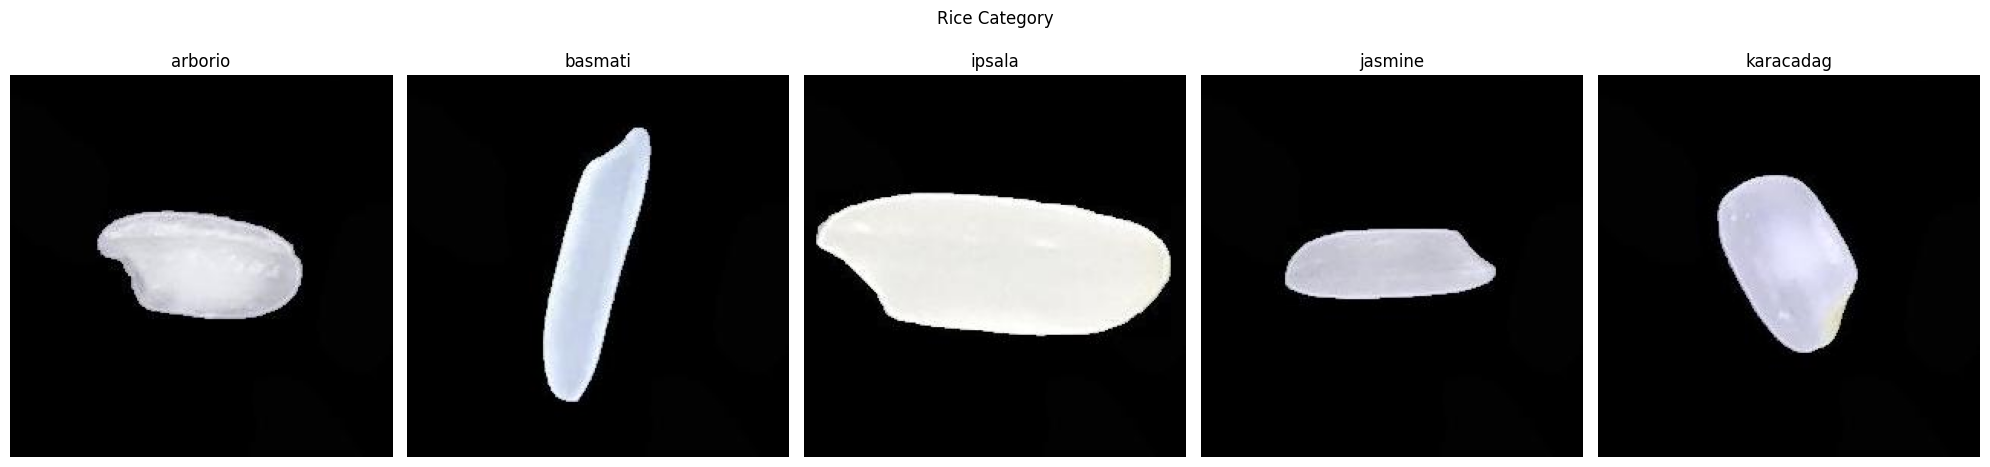

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Use a safe name, not 'img'

# Replace these with your actual image file paths
arborio = ['/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (1).jpg']
basmati = ['/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/Basmati (1).jpg']
ipsala = ['/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (1).jpg']
jasmine = ['/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (1).jpg']
karacadag = ['/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (1).jpg']

fig, ax = plt.subplots(ncols=5, figsize=(20, 5))
fig.suptitle('Rice Category')


arborio_image = mpimg.imread(arborio[0])
basmati_image = mpimg.imread(basmati[0])
ipsala_image = mpimg.imread(ipsala[0])
jasmine_image = mpimg.imread(jasmine[0])
karacadag_image = mpimg.imread(karacadag[0])


ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

!pip install tensorflow_hub


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import kagglehub


In [ ]:
import tensorflow as tf
import kagglehub

# Step 1: Load the model
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector")
loaded_model = tf.saved_model.load(path)

# Step 2: Inspect model output to confirm what it returns
# Use a dummy input to test
dummy_input = tf.random.normal([1, 224, 224, 3])
output = loaded_model(dummy_input)
print("Model Output:", output)  # Run this once to see the structure

# Step 3: Define wrapper WITHOUT assuming output is a dict
class MobilenetWrapper(tf.keras.layers.Layer):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs):
        return self.model(inputs)  # No ['default'] here

# Step 4: Build your model
inputs = tf.keras.Input(shape=(224, 224, 3), dtype=tf.float32)
x = MobilenetWrapper(loaded_model)(inputs)
x = tf.keras.layers.Flatten()(x)  # Add this if output is 2D
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Step 5: Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Summary
model.summary()



2025-06-27 04:16:49.976686: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model Output: tf.Tensor([[0.         0.79966253 0.         ... 0.0107478  0.14775328 0.2700447 ]], shape=(1, 1280), dtype=float32)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_wrapper (MobilenetWrapper) │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(

optimizer="adam",

loss=tf.keras.losses. SparseCategoricalCrossentropy(from_logits=True),

metrics=['acc'])

In [ ]:
import numpy as np
print(np.unique(y_train))


[0 1 2 3 4]


In [ ]:
# 1. Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # assuming 5 classes
])

# 2. Compile the model
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5702 - loss: 3.2656 - val_accuracy: 0.8883 - val_loss: 0.2628
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9839 - loss: 0.0751 - val_accuracy: 0.9574 - val_loss: 0.1401
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9943 - loss: 0.0283 - val_accuracy: 0.9309 - val_loss: 0.1673
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9989 - loss: 0.0115 - val_accuracy: 0.9468 - val_loss: 0.1511
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9574 - val_loss: 0.1342
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9468 - val_loss: 0.1474
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9574 - val_loss: 0.1392
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9574 - val_loss:

In [ ]:
model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.9735 - loss: 0.0655


[0.09573101252317429, 0.9679715037345886]

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)

y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 503ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.97      0.98      0.97       122
           2       0.99      1.00      1.00       110
           3       0.96      0.95      0.96       106
           4       0.95      0.97      0.96       115

    accuracy                           0.97       562
   macro avg       0.97      0.97      0.97       562
weighted avg       0.97      0.97      0.97       562



In [ ]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Fix for Kaggle Notebooks
pio.renderers.default = 'iframe_connected'

acc = pd.DataFrame({
    'epoch': range(1, len(history.history['accuracy']) + 1),
    'train': history.history['accuracy'],
    'val': history.history['val_accuracy']
})

fig = px.line(
    acc,
    x='epoch',
    y=['train', 'val'],
    title='Training and Validation Accuracy',
    labels={'value': 'Accuracy', 'variable': 'Dataset', 'epoch': 'Epoch'}
)

fig.show()


In [ ]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'iframe_connected'  # Most reliable for Kaggle

loss = pd.DataFrame({
    'epoch': range(1, len(history.history['loss']) + 1),
    'train': history.history['loss'],
    'val': history.history['val_loss']
})

fig = px.line(
    loss,
    x='epoch',
    y=['train', 'val'],
    title='Training and Validation Loss',
    labels={'value': 'Loss', 'variable': 'Dataset', 'epoch': 'Epoch'}
)

fig.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_data = datagen.flow_from_directory(
    '/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',   # For integer labels
    subset='training',
    shuffle=True,
    seed=42
)

# Validation data generator
val_data = datagen.flow_from_directory(
    '/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    shuffle=True,
    seed=42
)

# Check class indices
print("Class indices:", train_data.class_indices)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Class indices: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [ ]:
class_names = list(train_data.class_indices.keys())

# Example: Predict on one image (make sure preprocessing matches)
img = cv2.imread('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/Basmati (1).jpg')
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
pred_class_idx = np.argmax(pred)
print("Predicted class:", class_names[pred_class_idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: Basmati


In [ ]:
# Convert prediction to class index
predicted_index = np.argmax(pred)

# Loop through the dictionary to find matching class name
for class_name, class_index in df_labels.items():
    if predicted_index == class_index:
        print("Predicted class:", class_name)
        break


Predicted class: basmati


In [ ]:
model.save("rice.h5")